<a href="https://colab.research.google.com/github/bishaddebroy/Machine-Learning-CSE-475-Project/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k # in case I miss any methods I want to use

In [2]:
from google.colab import files #Only use for Google Colab
uploaded = files.upload()      #Only use for Google Colab
df = pd.read_csv("diabetes.csv")
    
#Print the first 5 rows
df.head()

Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# get the shape of data (total number of pitents and collumn)
df.shape

(768, 9)

In [4]:
#Create a list of columns to retain
columns_to_retain = ["Pregnancies", "Glucose", "BloodPressure", "BMI",
                         "pcv", "Outcome"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [5]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,Outcome
0,6,86,22,33.6,1
1,1,23,19,26.6,0
2,8,121,17,23.3,1
3,1,27,19,28.1,0
4,0,75,4,43.1,1


In [7]:
#Split the data into independent'X'(the features) and dependent 'y' variables (the target)
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [8]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
BMI              float64
Outcome            int64
dtype: object

In [9]:
#from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,0].values)
df.iloc[:,0:3]

,Pregnancies,Glucose,BloodPressure
0,6,86,22
1,1,23,19
2,8,121,17
3,1,27,19
4,0,75,4
...,...,...,...
763,10,39,25
764,2,60,21
765,5,59,22
766,1,64,14


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


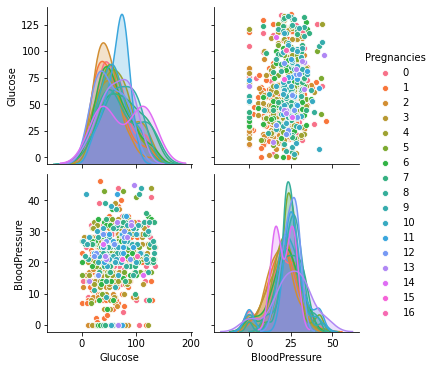

In [10]:
import seaborn as sns
sns.pairplot(df.iloc[:, 0:3], hue='Pregnancies')

In [11]:
#Feature Scaling
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [12]:
#Split the data into 80% training and 20% testing & Shuffle the data before splitting
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [13]:
#Build The model
#  The models input shape/dimensions is the number of features/columns in the data set
#  The model will have 2 layers:
#      (i) The first with 256 neurons and the ReLu activation function & a initializer which 
#          defines the way to set the initial random weights of the Keras layers. 
#          We'll use a initializer that generates tensors with a normal distribution.
#     (ii) The other layer will have 1 neuron with the activation function 'hard_sigmoid'
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),
                    kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))